# Data Cleaning & EDA

1. After Webscraping, the data will need to be combine and cleaned.

2. EDA will be carried out next to check if there are any issues with the 'text feature' before modelling

3. In the final EDA, we will rate the overall text feature to see if it potray a good idea on the topics. 
a. For instance: 
'Marriage' : tends to a more positive tone
'Divorce'  : tends to a more negative tone
** note this might not be true and it is an assumption.

## Data Cleaning using countvectorizer and Tfidfvectorizer

In [181]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [182]:
# Import Tokenizer
from nltk.tokenize import RegexpTokenizer

import regex as re

# Import lemmatizer. (Same as above.)
from nltk.stem import WordNetLemmatizer

# Instantiate stemmer.
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.corpus import stopwords # Import the stop word list

### import relevant dataframes from csv
#### Category 1 : 'Marriage' 
#### Category 2 : 'Divorce'

In [183]:
topic1 = 'Marriage' 
topic2 = 'Divorce'

In [184]:
csv1 = '{}.csv'.format(topic1)
csv2 = '{}.csv'.format(topic2)

In [185]:
df_cat1 = pd.read_csv(csv1)

In [186]:
df_cat2 = pd.read_csv(csv2)

In [187]:
cols = ['title', 'selftext','subreddit']
df = pd.concat([df_cat1[cols],df_cat2[cols]],)

In [188]:
df.shape

(1755, 3)

In [189]:
df.reset_index(drop = True, inplace = True)

In [190]:
df.head()

,title,selftext,subreddit
0,"Something Nice and Happy, sort of",Last Sunday marked the 31st anniversary of the...,Marriage
1,I had the best weekend with my husband,"Last weekend, we got out of work early on Frid...",Marriage
2,Sex In Marriage,Growing up sex was not talked about. No sex ed...,Marriage
3,Indifference,If someone loved you and they feel indifferenc...,Marriage
4,"My husband needs a lot of ""alone"" time. What s...","We've been together for 6 years, married for 3...",Marriage


In [191]:
def change_subreddit(text):
    if text == topic1:
        return 1
    elif text == topic2:
        return 0

In [192]:
df.subreddit = df.subreddit.apply(change_subreddit)
df.subreddit.isnull().sum()

0

In [193]:
df.drop_duplicates(inplace = True)
df['text_feature'] = df.title + df.selftext
df.shape

(1706, 4)

In [194]:
df.head()

,title,selftext,subreddit,text_feature
0,"Something Nice and Happy, sort of",Last Sunday marked the 31st anniversary of the...,1,"Something Nice and Happy, sort ofLast Sunday m..."
1,I had the best weekend with my husband,"Last weekend, we got out of work early on Frid...",1,I had the best weekend with my husbandLast wee...
2,Sex In Marriage,Growing up sex was not talked about. No sex ed...,1,Sex In MarriageGrowing up sex was not talked a...
3,Indifference,If someone loved you and they feel indifferenc...,1,IndifferenceIf someone loved you and they feel...
4,"My husband needs a lot of ""alone"" time. What s...","We've been together for 6 years, married for 3...",1,"My husband needs a lot of ""alone"" time. What s..."


In [195]:
df = df[['text_feature','subreddit']]

In [196]:
df.head()

,text_feature,subreddit
0,"Something Nice and Happy, sort ofLast Sunday m...",1
1,I had the best weekend with my husbandLast wee...,1
2,Sex In MarriageGrowing up sex was not talked a...,1
3,IndifferenceIf someone loved you and they feel...,1
4,"My husband needs a lot of ""alone"" time. What s...",1


In [199]:
def preprocessing(text):
    # Instantiate tokenizer.
    tokenizer = RegexpTokenizer(r'\w+')
    
    # Tokenize text.
    tokens = tokenizer.tokenize(text.lower())
    
    # Instantiate stemmer.
    p_stemmer = PorterStemmer()
    
    # Stem words.
    stemmed_words = [p_stemmer.stem(i) for i in tokens]
    
    return 

def review_to_words(raw_review):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    
#     # 1. Remove HTML.
#     review_text = bs(raw_review).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords.words('english'))
    
    # 5. Remove stop words.
    meaningful_words = [w for w in words if not w in stops]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [200]:
df.text_feature = df.text_feature.apply(review_to_words)

In [201]:
df[['text_feature','subreddit']].head()


,text_feature,subreddit
0,something nice happy sort oflast sunday marked...,1
1,best weekend husbandlast weekend got work earl...,1
2,sex marriagegrowing sex talked sex education m...,1
3,indifferenceif someone loved feel indifference...,1
4,husband needs lot alone time lonely evenings t...,1


# EDA

In [202]:
#cat 1,marriage = 1, cat 2 divorce =0
df.text_feature[df.subreddit == 1].shape,df.text_feature[df.subreddit == 0].shape

((733,), (973,))

In [203]:
# CountVectorizer and TridVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

cevc = CountVectorizer(stop_words='english',max_df = 0.98, min_df = 0.02, max_features=5000,ngram_range=(1,3))
tfidf = TfidfVectorizer(stop_words='english',max_df = 0.98, min_df = 0.02, max_features=5000,ngram_range=(1,3))

#I tried a version where i remove stop words but the result were the similar for the top 20.
# cevc_1 = CountVectorizer(max_df = 0.98, min_df = 0.02, max_features=5000,ngram_range=(1,3))
# tfidf_1 = TfidfVectorizer(max_df = 0.98, min_df = 0.02, max_features=5000,ngram_range=(1,3))

1. For both case Remove stop words ='English'
2. set tolerance at 2% for both max_df and min_df. 
    a. 2% is selected as a trial an error
3. Max feature for EDA purpose is set to 5000. Ensuring a good enough pool of features for analysis later.
4. ngram_range is set to (1,3). This is to ensure that most phases 'I Love you', 'i am done' are captured. Especially considering that the topic is on marriage and Divorce

#### Compare between the CEVC and TFIDF text feature. 
#### show top 5 text feature for prediction and determine of there are difference betweem the,

### CAT 1: Marriage


In [204]:
df_cat1_cevc = pd.DataFrame(cevc.fit_transform(df.text_feature[df.subreddit == 1]).todense()
, columns=cevc.get_feature_names())
print(df_cat1_cevc.sum().sort_values(ascending = False).head())

df_cat1_tfidf = pd.DataFrame(tfidf.fit_transform(df.text_feature[df.subreddit == 1]).todense()
, columns=tfidf.get_feature_names())
df_cat1_tfidf.sum().sort_values(ascending = False).head()


like       1027
time        823
feel        718
husband     715
want        710
dtype: int64


like       38.123492
husband    35.600098
time       32.653673
want       32.551840
wife       32.368960
dtype: float64

1. In both CountVectorizer & TfidfVectorizer 'like' appears as the top most text feature however the word 'marraige' does not appear in CountVectorizer. 
2. The difference bewetten :
    #### CountVectorizer
    a. like       1003
    b. husband     712
    #### TfidfVectorizer        
    a. like        34.217459
    b. husband     31.525269
    The ratio of difference between A and B is not propotional. 
    Perhaps TfidfVectorizer would be better suited for modelling categorise that have similar tone/topic.

Plot a horizontal bar char to observe the values for the top 20 to gauge how does the difference operate between CountVectorizer and TfidfVectorizer

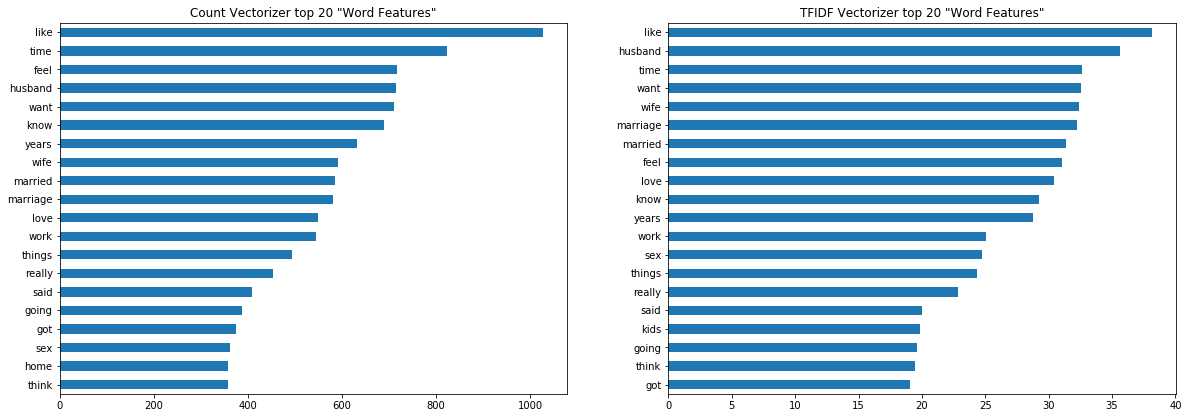

In [205]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
df_cat1_cevc.sum().sort_values(ascending = True).tail(20).plot(kind='barh');
plt.title('Count Vectorizer top 20 "Word Features"')
plt.subplot(2,2,2)
df_cat1_tfidf.sum().sort_values(ascending = True).tail(20).plot(kind='barh');
plt.title('TFIDF Vectorizer top 20 "Word Features"')
plt.show()

The Graph shows the top 20 word features. 
From the Graph above, the word 'marriage' and 'married' appears in TFIDF twice, both have the same root meaning. 
There might be a need to carry out lementising for 'df.text_feature'

### CAT  2: Divorce


In [206]:
df_cat2_cevc = pd.DataFrame(cevc.fit_transform(df.text_feature[df.subreddit == 0]).todense()
, columns=cevc.get_feature_names())
print(df_cat2_cevc.sum().sort_values(ascending = False).head())

df_cat2_tfidf = pd.DataFrame(tfidf.fit_transform(df.text_feature[df.subreddit == 0]).todense()
, columns=tfidf.get_feature_names())
df_cat2_tfidf.sum().sort_values(ascending = False).head()

like       1050
divorce    1038
time        960
want        940
know        921
dtype: int64


divorce    51.907807
like       44.463046
want       44.102877
kids       42.415488
years      41.021798
dtype: float64

1. Surprisingly the top 5 words are the same for both countvectorizer and Tfidfvectorizer 

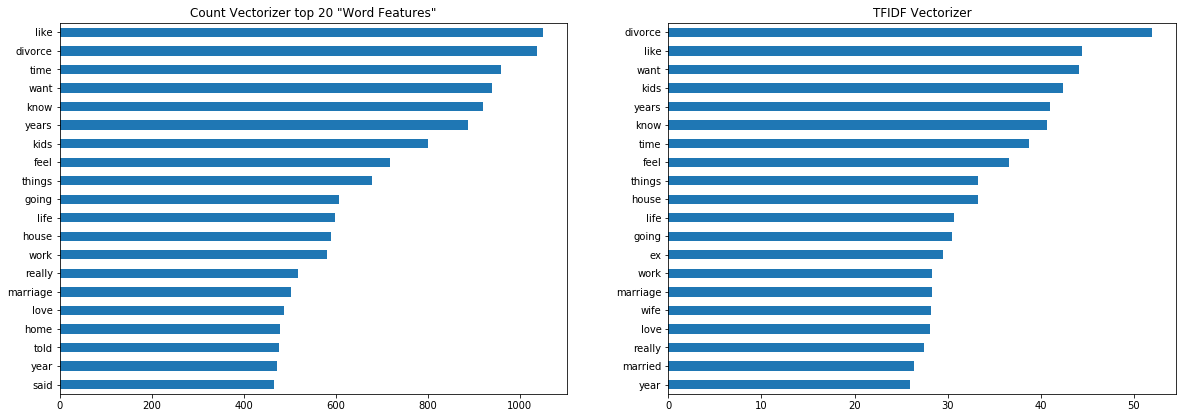

In [207]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
df_cat2_cevc.sum().sort_values(ascending = True).tail(20).plot(kind='barh');
plt.title('Count Vectorizer top 20 "Word Features"')
plt.subplot(2,2,2)
df_cat2_tfidf.sum().sort_values(ascending = True).tail(20).plot(kind='barh');
plt.title('TFIDF Vectorizer')
plt.show()

(-0.5, 1199.5, 599.5, -0.5)

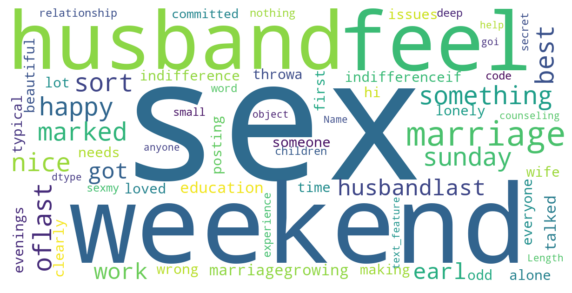

In [209]:
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
wordcloud=WordCloud(scale = 3, 
                    max_words=1000,
                    background_color='white').generate(str(df.text_feature[df.subreddit == 1]))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')


1. Marriage and Married both have same root. 
2. The featured words within the wordcloud is unexpected as most carry a more negative note.

(-0.5, 1199.5, 599.5, -0.5)

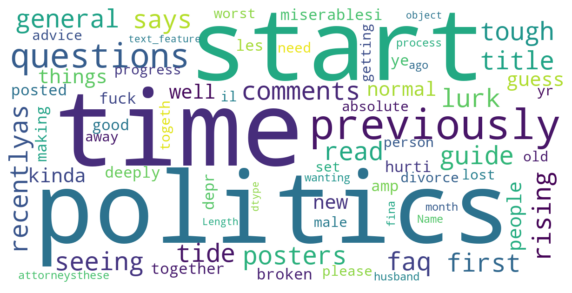

In [210]:
plt.figure(figsize=(10,10))
wordcloud=WordCloud(scale = 3, 
                    max_words=1000,
                    background_color='white').generate(str(df.text_feature[df.subreddit == 0]))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')


## Please note that the below contains a trial sentimental analysis to gauge overall sentiment of the post received. ****

1. The overall sentiment of the category from the wordcloud is towards negative note/tone. This is to be expected considering that the 'divorce' tends to have a more negative connotation to it.
positive note link : https://jackiebledsoe.com/50-words-that-describe-your-dream-marriage/
negative note link : https://www.macmillandictionary.com/thesaurus-category/british/fidelity-infidelity-and-marriage-problems

In [211]:
#Note this is not part of the problem statment but this is to build it further to see if there is any form of expectation 
positive_note = ['Compromise','Dedication','Humor-filled','Respectful','Godly','Safe','Effort','Acceptance',
                 'Great sex','Patience','Perseverance','Silly','Loyalty','Dedication','Communication',
                 'Honest','Fun','Laughter','Kindness','Forgiving','Understanding','Passionate','Gracious',
                 'Friendship','Familiar','Relaxed','Faithfulness','Truth','Consistency','Love','Hope',
                 'Commitment','Sacrifice','Open-minded','Togetherness','Oneness','Best friends','Partnership',
                 'Self-awareness','Partners','God-sent','Blessed','Influential','Grace-filled','Caring','Serving']
positive_note= [item.lower()for item in positive_note]

In [212]:
negative_note =['adulterer' ,'adulteress' ,'adulterous','adultery', 'affair', 
                'another woman', 'bigamy', 'cheat' ,'cuckold', 'deceive' ,'extramarital', 'unfaithful' ,
                'fidelity' ,'fool around', 'infidelity' ,'lover', 'love triangle', 'mistress', 'on the side', 
                'the other woman', 'play around phrasal', 'play away', 'the seven year itch', 
                'two time', 'unfaithful', 'untrue', 'fucker', 'fuck']

In [213]:
positive = []
negative = []
for text in df.text_feature[df.subreddit==1]:
        p_value = 0
        n_value = 0
        for pos in positive_note:
            if pos in text:
                p_value +=1
        positive.append(p_value)
        for nev in negative_note:
            if nev in text:
                n_value +=1
        negative.append(n_value)
Percentage = round((sum(positive)/(sum(negative)+sum(positive)))*100,2)        
print('The overall tone for "Marriage" is slightly more positive by the percentage of {}% positive tone words used'.format(Percentage))

The overall tone for "Marriage" is slightly more positive by the percentage of 82.49% positive tone words used


this is unexpected as the word cloud shows a more negative tone

In [214]:
positive = []
negative = []
for text in df.text_feature[df.subreddit==0]:
        p_value = 0
        n_value = 0
        for pos in positive_note:
            if pos in text:
                p_value +=1
        positive.append(p_value)
        for nev in negative_note:
            if nev in text:
                n_value +=1
        negative.append(n_value)
        
Percentage = round((sum(positive)/(sum(negative)+sum(positive)))*100,2)        
print('The overall tone for "Divorce" is slightly more positive by the percentage of {}% positive tone words used'.format(Percentage))

The overall tone for "Divorce" is slightly more positive by the percentage of 72.46% positive tone words used


This is unexpected. Im speechless. Probably better internet websites can be found to use better negative tone words to describe divorce